In [72]:
% load_ext autoreload
% autoreload 2

import numpy as np

from matplotlib import pyplot as plt

import sys
sys.path.append('..')
from src.datasets.synthetic_multivariate_dataset import SyntheticMultivariateDataset
from src.datasets.synthetic_multivariate_dataset import doubled_dim2, inversed_dim2, shrinked_dim2, delayed_dim2, xor_dim2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TODO:
- XOR (Anomaly -> gleichzeitig)
- Ableitung (Geschwindigkeit vs Beschleunigung)
- Invers

## Test pipeline implementation

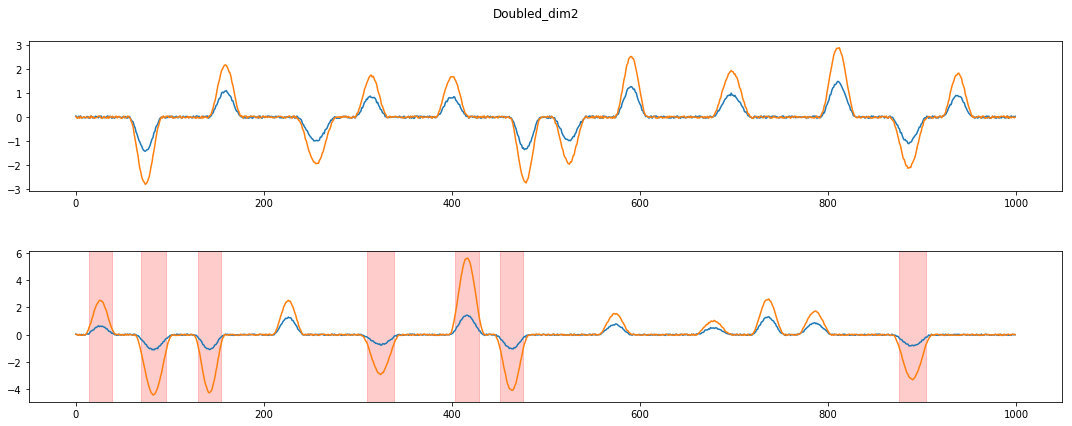

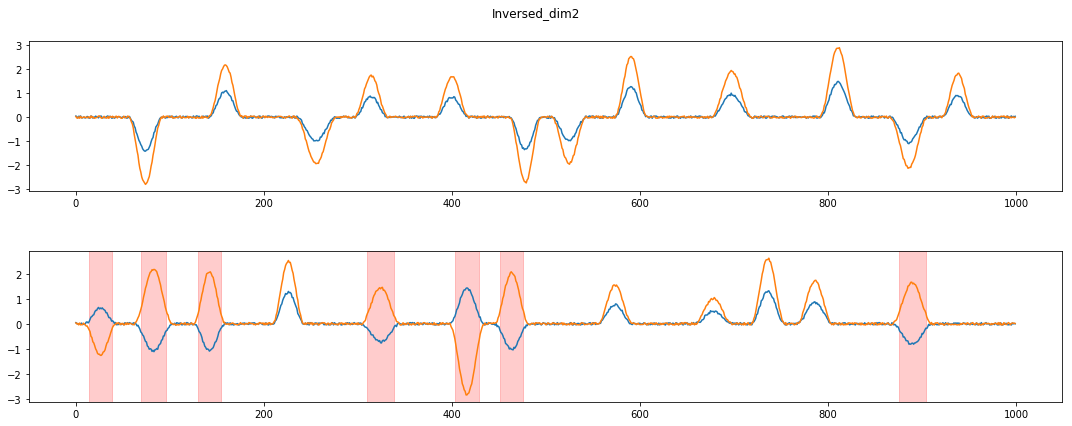

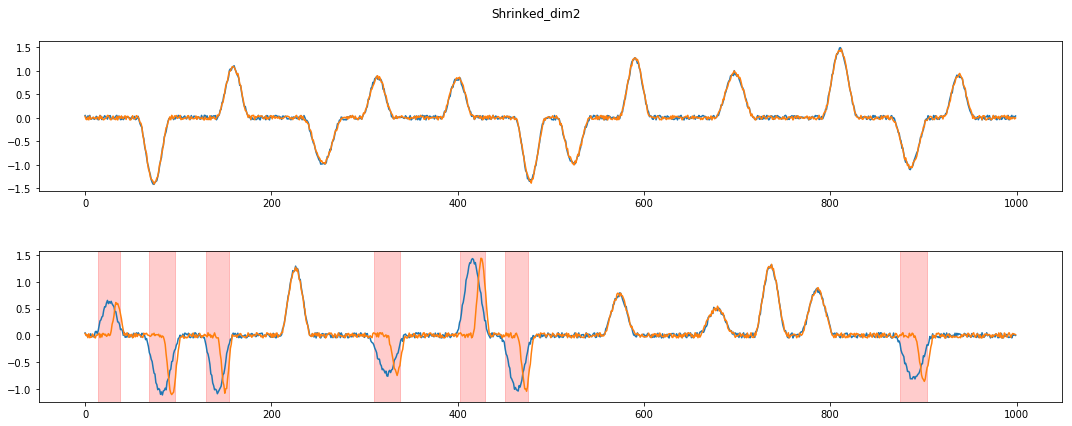

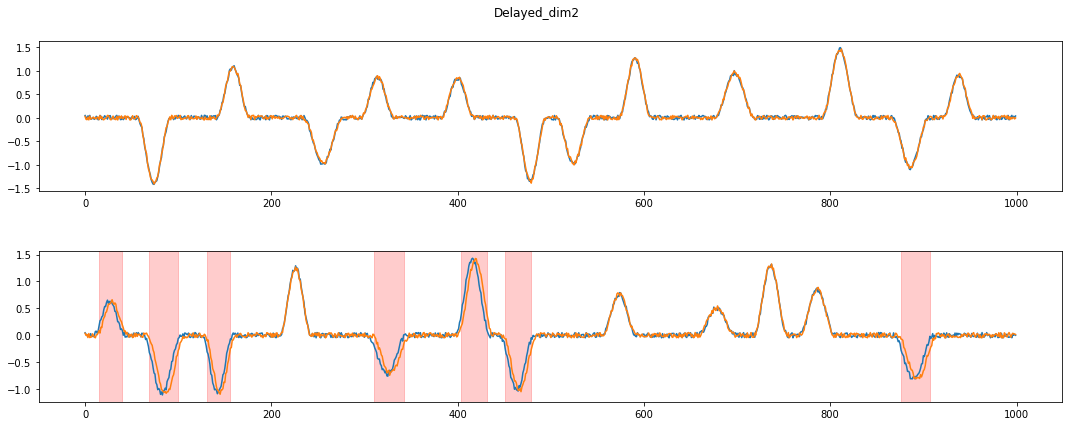

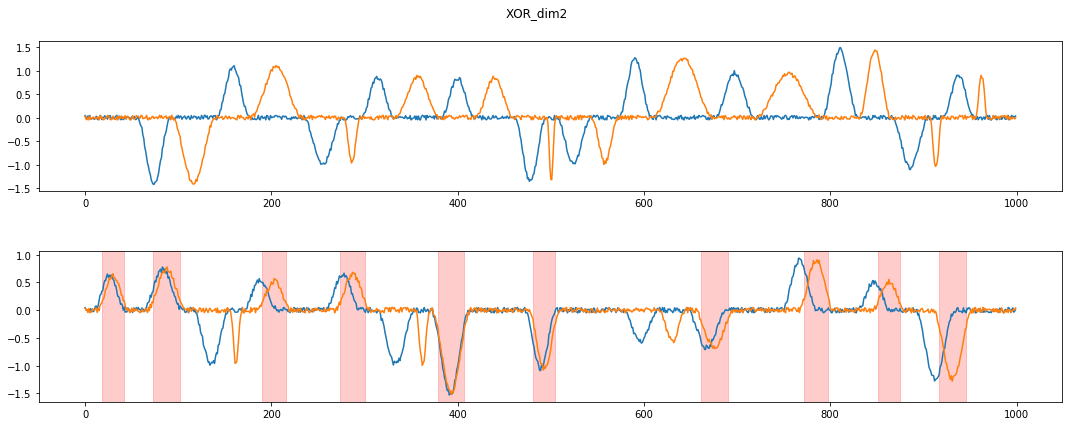

In [114]:
def plot_dataset(X_train, X_test, y_test, title):
    fig, axes = plt.subplots(2, 1, figsize=(15, 6))
    axes[0].plot(X_train)
    axes[1].plot(X_test)

    starts = np.arange(0, len(y_test))[(y_test == 1) & (y_test.shift(1) == 0)]
    ends = np.arange(0, len(y_test))[(y_test == 1) & (y_test.shift(-1) == 0)]
    for start_idx, end_idx in zip(starts, ends):
        axes[1].axvspan(start_idx, end_idx, alpha=0.2, color='red')
    
    fig.suptitle(title)
    fig.tight_layout()
    
    # Avoid overlapping title and axis labels
    fig.subplots_adjust(top=0.9, hspace=0.4)
    fig.savefig(f'Multivariate-Dataset-{title}.pdf')

def generate_and_plot_dataset(dim2, title):
    dataset = SyntheticMultivariateDataset(length=1000, dim2=dim2)
    X_train, y_train, X_test, y_test = dataset.data()
    plot_dataset(X_train, X_test, y_test, title)

# dim2=doubled_dim2, inversed_dim2, shrinked_dim2, delayed_dim2, xor_dim2
generate_and_plot_dataset(doubled_dim2, 'Doubled_dim2')
generate_and_plot_dataset(inversed_dim2, 'Inversed_dim2')
generate_and_plot_dataset(shrinked_dim2, 'Shrinked_dim2')
generate_and_plot_dataset(delayed_dim2, 'Delayed_dim2')
generate_and_plot_dataset(xor_dim2, 'XOR_dim2')